skewness of column(x1): 4.290130622189554
skewness of column(x2): 0.0
skewness of column(y): 10.355241349505134
r2_score: 0.498353813401178


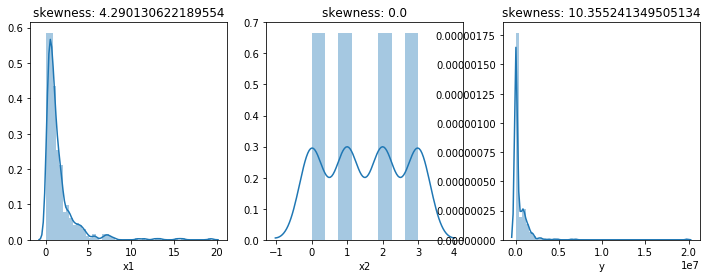

In [188]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import scipy

import itertools 
import seaborn as sns 
from matplotlib import gridspec

sample_size = 500
x1 = np.exp(np.random.normal(0, 1, sample_size)) # numerical value
x2 = np.array(list(itertools.chain.from_iterable([[i for j in range(0, sample_size//4)] for i in range(0, 4)])))

# skewness를 높이기 위해서, 거듭제곱한다. 
y = (x1 * 1 + x2*5 + np.random.normal(0, 1, sample_size))**5

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
X = df[['x1', 'x2']]
Y = df['y']

for col in df.columns:
    print("skewness of column({}): {}".format(col, scipy.stats.skew(df[col])))

reg = LinearRegression()
reg.fit(df[['x1', 'x2']], df['y'])
print("r2_score: {}".format(r2_score(Y, reg.predict(X))))

# 그림을 그려줍니다. 
f, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(df.columns):
    #axes[i].scatter(df[col], y, alpha=0.5)
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title("skewness: {}".format(scipy.stats.skew(df[col])))
    axes[i].set_xlabel(col)
plt.savefig('../../assets/images/markdown_img/180606_2107_data_preprocess.svg')
plt.show()

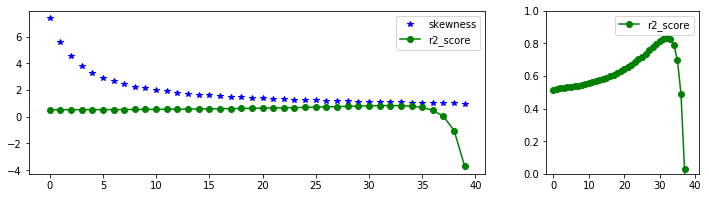

In [217]:

"""
- 사실 scaling 자체는 r2_score 자체를 변화시키지는 않습니다. 
- 하지만, 향후 np.log1p를 할때나, 등등에 현재 값들에 모두 양수만 있고, 또 outlier에 대해서 강건하게 처리해주는 것이 좋기 때문에 
일단 이 두가지에 대해서 모두 scaling을 해줍니다. 
"""
scaler1 = MinMaxScaler()
scaler2 = RobustScaler()
X_scaled = scaler1.fit_transform(scaler2.fit_transform(X.values.reshape(-1, 2)))
Y_scaled = scaler1.fit_transform(scaler2.fit_transform(Y.values.reshape(-1, 1)))

Y_scaled_log = Y_scaled

skew_lst = []
r2_score_lst = []
for i in range(0, 40):
    Y_scaled_log = np.log1p(Y_scaled_log)
    #print("np log {}, skewness: {}".format(i, scipy.stats.skew(Y_scaled_log)))
    skew_lst.append(scipy.stats.skew(Y_scaled_log))
    
    reg = LinearRegression()
    reg.fit(X_scaled, Y_scaled_log)
    Y_scaled_pred = reg.predict(X_scaled)
    for j in range(0, i+1):
        Y_scaled_pred = np.exp(Y_scaled_pred) - 1
    #print("r2_score: {}".format(r2_score(Y_scaled, Y_scaled_pred)))
    r2_score_lst.append(r2_score(Y_scaled, Y_scaled_pred))


fig = plt.figure(figsize=(12, 3)) 
gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=2, # col 몇 개 
                       width_ratios=[9, 3]
                      )

#print(max(r2_score_lst)), 0.81
ax0 = plt.subplot(gs[0])
ax0.plot(skew_lst, 'b*', label='skewness')
ax0.plot(r2_score_lst, 'go-', label='r2_score')
#ax0.set_ylim(min(r2_score_lst), max(skew_lst))
plt.legend()

ax1 = plt.subplot(gs[1])
ax1.plot(r2_score_lst, 'g-o', label='r2_score')
ax1.set_ylim(0, 1)
plt.legend()
plt.savefig('../../assets/images/markdown_img/180606_2114_skewness_r2_score_change.svg')

plt.show()

In [258]:
"""handling missing values
"""
import numpy as np 
import pandas as pd

numericCol = pd.Series([1, 1, 1, 2, 3, 4, 5, np.nan, 7, np.nan])
print("missing value: {}".format(numericCol.isnull().sum()))
print("-------")
print(a.fillna(numericCol.mean()))
print("-------")
nonNumericCol = pd.Series(['a', 'b', 'c', 'b', 'a', np.nan])
# 가장 많은 걸로 채우기 
print(nonNumericCol.fillna( nonNumericCol.mode()[0]))
print("-------")

missing value: 2
-------
0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    3.0
8    7.0
9    3.0
dtype: float64
-------
0    a
1    b
2    c
3    b
4    a
5    a
dtype: object
-------


In [232]:
X_scaled_log = pd.DataFrame({'x1':X_scaled[:, 0], 'x2':X_scaled[:, 1]})

print(X_scaled_log)

for i in range(0, 5):
    X_scaled_log['x1'] = np.log1p(X_scaled_log['x1'])
    print(X_scaled_log['x1'].skew())

           x1   x2
0    0.045929  0.0
1    0.192980  0.0
2    0.049027  0.0
3    0.007814  0.0
4    0.101995  0.0
5    0.035596  0.0
6    0.044763  0.0
7    0.004850  0.0
8    0.038635  0.0
9    0.827172  0.0
10   0.058957  0.0
11   0.158770  0.0
12   0.062215  0.0
13   0.079593  0.0
14   0.063090  0.0
15   0.012673  0.0
16   0.197388  0.0
17   0.209689  0.0
18   0.036161  0.0
19   0.071386  0.0
20   0.028462  0.0
21   0.045208  0.0
22   0.168511  0.0
23   0.096305  0.0
24   0.005352  0.0
25   0.260959  0.0
26   0.009588  0.0
27   0.045509  0.0
28   0.033745  0.0
29   0.034886  0.0
..        ...  ...
470  0.112277  1.0
471  0.052985  1.0
472  0.048793  1.0
473  0.038753  1.0
474  0.035716  1.0
475  0.028978  1.0
476  0.057191  1.0
477  0.027479  1.0
478  0.127039  1.0
479  0.031887  1.0
480  0.099344  1.0
481  0.078925  1.0
482  0.063082  1.0
483  0.096094  1.0
484  0.072545  1.0
485  0.004384  1.0
486  0.011104  1.0
487  0.058061  1.0
488  0.117984  1.0
489  0.009373  1.0
490  0.01386

In [123]:
np.log1p(10)

np.exp(np.log1p(10))-1

10.000000000000002